In [1]:
import os
import pandas as pd
import sys
import numpy as np
from pandas.core.common import flatten
import pickle
import umap
from pathlib import Path
import datetime
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import librosa.display
import random
import scipy
from scipy.spatial.distance import pdist, squareform
from matplotlib import gridspec

from plot_functions import umap_2Dplot, mara_3Dplot, plotly_viz
from preprocessing_functions import pad_spectro, calc_zscore

In [2]:
wd = os.getcwd()

DATA = os.path.join(os.path.sep, str(Path(wd).parents[0]), "data", "processed")
FIGURES = os.path.join(os.path.sep, str(Path(wd).parents[0]), "reports", "figures", "distance_specs")

if (not os.path.isdir(FIGURES)):
    os.mkdir(FIGURES)

spec_df = pd.read_pickle(os.path.join(os.path.sep, DATA, "df_focal_reduced.pkl"))

In [3]:
specs = spec_df.spectrograms.copy()

# normalize feature
specs = [calc_zscore(x) for x in specs] 

# pad feature
maxlen= np.max([spec.shape[1] for spec in specs])
flattened_specs = [pad_spectro(spec, maxlen).flatten() for spec in specs]
data = np.asarray(flattened_specs)
data.shape

(6430, 5360)

In [5]:
embedding_filename = os.path.join(os.path.sep, DATA,'basic_UMAP_3D_reduced_default_params.csv')
embedding = np.loadtxt(embedding_filename, delimiter=";")

In [26]:
distmat = squareform(pdist(embedding, metric='euclidean'))

In [7]:
distmat_original = squareform(pdist(data, metric='euclidean'))

3745
/home/mthomas/Documents/MPI_work/projects/meerkat/meerkat_umap_pv/reports/figures/distance_specs/neighbors_1_3745.png


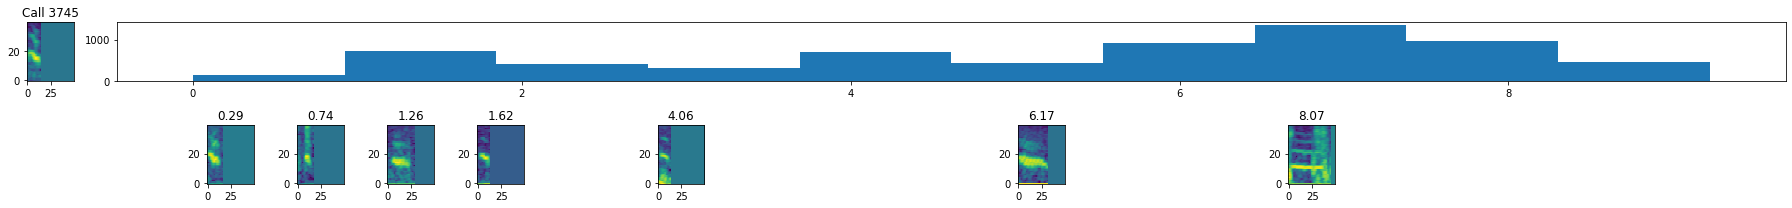

In [8]:
n_samples = 1
n_mels = 40
n_segments = 8

# pick a random call
call_ind = np.random.choice(data.shape[0],1)[0]
print(call_ind)
call_dists = distmat[call_ind,:]

fig =plt.figure(figsize=(25,3))
gs = gridspec.GridSpec(2, 20, fig)

fig.add_subplot(gs[:1, 1:20])
n, bins, patches = plt.hist(call_dists)

dist_borders = []
quantile_steps = [0, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5, 0.9]

for q in quantile_steps:
    dist_borders.append(np.quantile(call_dists, q))
    
segment_len = int(len(call_dists)/n_segments)
segment_calls = {}


for i in range(n_segments-1):
    x = np.where((call_dists>dist_borders[i]) & (call_dists<dist_borders[i+1]))[0]
    segment_calls[i] = np.random.choice(x, n_samples)
    
#plt.figure(figsize=(20,3))

#plt.subplot(1,n_segments, 1)
#fig.add_subplot(gs[:2, :2])
fig.add_subplot(gs[:1, 0])
spec = data[call_ind,:].reshape((n_mels, int(data.shape[1]/n_mels)))
plt.imshow(spec[:,0:50], interpolation="nearest", origin="lower", aspect="auto")
plt.title('Call '+str(call_ind))
k=1

spec_poses = [0,1,2,3,5,9,12]
spec_poses = [x+2 for x in spec_poses]

#for segment in segment_starts.keys():
#    call_inds = sorted_indices[segment_starts[segment]:segment_starts[segment]+n_samples]
for i,segment in enumerate(segment_calls.keys()):    
    call_inds = segment_calls[segment]
    mean_dist = np.mean(call_dists[call_inds])
    call_data = data[call_inds,:]
    
    # calcualte average spectrogram   
    mean_data = np.mean(call_data, axis=0)
    
    # reshape
    mean_spec = mean_data.reshape((n_mels,int(data.shape[1]/n_mels)))
    
    fig.add_subplot(gs[1:, spec_poses[i]])
    #plt.subplot(1, n_segments, k)
    plt.imshow(mean_spec[:,0:50], interpolation="nearest", origin="lower", aspect="auto")
    #plt.title(str(quantile_steps[k-1]*100)+"-"+str(quantile_steps[k]*100)+" %")
    plt.title(str(round(dist_borders[k],2)))
    #plt.title(mean_dist)
    k=k+1
plt.tight_layout()
outname = os.path.join(os.path.sep,FIGURES, 'neighbors_1_'+str(call_ind)+'.png')
print(outname)
plt.savefig(outname, facecolor="white")

995
/home/mthomas/Documents/MPI_work/projects/meerkat/meerkat_umap_pv/reports/figures/distance_specs/neighbors_995.png


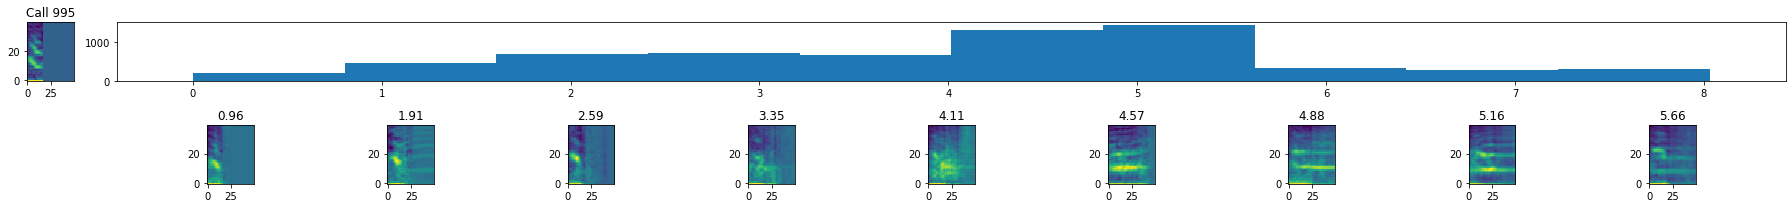

In [83]:
n_samples = 1
n_mels = 40
n_segments = 10

# pick a random call
call_ind = np.random.choice(data.shape[0],1)[0]
print(call_ind)
call_dists = distmat[call_ind,:]

fig =plt.figure(figsize=(25,3))
gs = gridspec.GridSpec(2, 20, fig)

fig.add_subplot(gs[:1, 1:20])
n, bins, patches = plt.hist(call_dists)

dist_borders = []
quantile_steps = [0, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
for q in quantile_steps:
    dist_borders.append(np.quantile(call_dists, q))
    
segment_len = int(len(call_dists)/n_segments)
segment_calls = {}


for i in range(n_segments-1):
    x = np.where((call_dists>dist_borders[i]) & (call_dists<dist_borders[i+1]))[0]
    segment_calls[i] = np.random.choice(x, n_samples)
    
#plt.figure(figsize=(20,3))

#plt.subplot(1,n_segments, 1)
#fig.add_subplot(gs[:2, :2])
fig.add_subplot(gs[:1, 0])
spec = data[call_ind,:].reshape((n_mels, int(data.shape[1]/n_mels)))
plt.imshow(spec[:,0:50], interpolation="nearest", origin="lower", aspect="auto")
plt.title('Call '+str(call_ind))
k=1

spec_poses = np.arange(2,20,2)
#spec_poses = [x+2 for x in spec_poses]

#for segment in segment_starts.keys():
#    call_inds = sorted_indices[segment_starts[segment]:segment_starts[segment]+n_samples]
for i,segment in enumerate(segment_calls.keys()):    
    call_inds = segment_calls[segment]
    mean_dist = np.mean(call_dists[call_inds])
    call_data = data[call_inds,:]
    
    # calcualte average spectrogram   
    mean_data = np.mean(call_data, axis=0)
    
    # reshape
    mean_spec = mean_data.reshape((n_mels,int(data.shape[1]/n_mels)))
    
    fig.add_subplot(gs[1:, spec_poses[i]])
    #plt.subplot(1, n_segments, k)
    plt.imshow(mean_spec[:,0:50], interpolation="nearest", origin="lower", aspect="auto")
    #plt.title(str(quantile_steps[k-1]*100)+"-"+str(quantile_steps[k]*100)+" %")
    #plt.title(str(round(dist_borders[k],2)))
    plt.title(str(round(mean_dist,2)))
    k=k+1
plt.tight_layout()
outname = os.path.join(os.path.sep,FIGURES, 'neighbors_1_'+str(call_ind)+'.png')
print(outname)
plt.savefig(outname, facecolor="white")

In [27]:
n_samples = 10
n_mels = 40
n_segments = 20

# pick a random call

random.seed = 1

for x in range(4):
    
    call_ind = np.random.choice(data.shape[0],1)[0]


    print(call_ind)
    call_dists = distmat[call_ind,:]

    fig =plt.figure(figsize=(25,3))
    gs = gridspec.GridSpec(2, 22, fig)

    fig.add_subplot(gs[:1, 1:22])
    n, bins, patches = plt.hist(call_dists)

    dist_borders = [(np.max(call_dists)/n_segments)*i for i in range(n_segments)]

    segment_len = int(len(call_dists)/n_segments)
    segment_calls = {}


    for i in range(n_segments-1):
        x = np.where((call_dists>dist_borders[i]) & (call_dists<dist_borders[i+1]))[0]
        segment_calls[i] = np.random.choice(x, n_samples)

    fig.add_subplot(gs[:1, 0])
    spec = data[call_ind,:].reshape((n_mels, int(data.shape[1]/n_mels)))
    plt.imshow(spec[:,0:50], interpolation="nearest", origin="lower", aspect="auto")
    plt.title('Call '+str(call_ind))
    k=1

    spec_poses = np.arange(2,22,1)

    for i,segment in enumerate(segment_calls.keys()):    
        call_inds = segment_calls[segment]
        mean_dist = np.mean(call_dists[call_inds])
        call_data = data[call_inds,:]

        # calcualte average spectrogram   
        mean_data = np.mean(call_data, axis=0)

        # reshape
        mean_spec = mean_data.reshape((n_mels,int(data.shape[1]/n_mels)))

        fig.add_subplot(gs[1:, spec_poses[i]])
        plt.imshow(mean_spec[:,0:50], interpolation="nearest", origin="lower", aspect="auto")
        plt.title(str(round(mean_dist,2)))
        k=k+1
    plt.tight_layout()
    outname = os.path.join(os.path.sep,FIGURES, 'prepro_neighbors_'+str(call_ind)+'.png')
    print(outname)
    plt.savefig(outname, facecolor="white")
    plt.close()




    call_dists = distmat_original[call_ind,:]

    fig =plt.figure(figsize=(25,3))
    gs = gridspec.GridSpec(2, 22, fig)

    fig.add_subplot(gs[:1, 1:22])
    n, bins, patches = plt.hist(call_dists)

    min_d = np.quantile(call_dists,0.05)
    max_d = np.quantile(call_dists,0.95)
    step_size = (max_d-min_d) /n_segments

    dist_borders = np.arange(min_d, max_d, step_size)

    segment_len = int(len(call_dists)/n_segments)
    segment_calls = {}


    for i in range(n_segments-1):
        x = np.where((call_dists>dist_borders[i]) & (call_dists<dist_borders[i+1]))[0]
        segment_calls[i] = np.random.choice(x, n_samples)

    fig.add_subplot(gs[:1, 0])
    spec = data[call_ind,:].reshape((n_mels, int(data.shape[1]/n_mels)))
    plt.imshow(spec[:,0:50], interpolation="nearest", origin="lower", aspect="auto")
    plt.title('Call '+str(call_ind))
    k=1

    spec_poses = np.arange(2,22,1)

    for i,segment in enumerate(segment_calls.keys()):    
        call_inds = segment_calls[segment]
        mean_dist = np.mean(call_dists[call_inds])
        call_data = data[call_inds,:]

        # calcualte average spectrogram   
        mean_data = np.mean(call_data, axis=0)

        # reshape
        mean_spec = mean_data.reshape((n_mels,int(data.shape[1]/n_mels)))

        fig.add_subplot(gs[1:, spec_poses[i]])
        plt.imshow(mean_spec[:,0:50], interpolation="nearest", origin="lower", aspect="auto")
        plt.title(str(round(mean_dist,2)))
        k=k+1
    plt.tight_layout()
    #outname = os.path.join(os.path.sep,FIGURES, 'neighbors_'+str(call_ind)+'_original.png')
    print(outname)
    plt.savefig(outname, facecolor="white")
    plt.close()

3464
/home/mthomas/Documents/MPI_work/projects/meerkat/meerkat_umap_pv/reports/figures/distance_specs/prepro_neighbors_3464.png
/home/mthomas/Documents/MPI_work/projects/meerkat/meerkat_umap_pv/reports/figures/distance_specs/prepro_neighbors_3464.png
799
/home/mthomas/Documents/MPI_work/projects/meerkat/meerkat_umap_pv/reports/figures/distance_specs/prepro_neighbors_799.png
/home/mthomas/Documents/MPI_work/projects/meerkat/meerkat_umap_pv/reports/figures/distance_specs/prepro_neighbors_799.png
977
/home/mthomas/Documents/MPI_work/projects/meerkat/meerkat_umap_pv/reports/figures/distance_specs/prepro_neighbors_977.png
/home/mthomas/Documents/MPI_work/projects/meerkat/meerkat_umap_pv/reports/figures/distance_specs/prepro_neighbors_977.png
2636
/home/mthomas/Documents/MPI_work/projects/meerkat/meerkat_umap_pv/reports/figures/distance_specs/prepro_neighbors_2636.png
/home/mthomas/Documents/MPI_work/projects/meerkat/meerkat_umap_pv/reports/figures/distance_specs/prepro_neighbors_2636.png
